# Extração dos Dados

In [1]:
import pandas as pd

In [2]:
RAW_URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

In [3]:
df = pd.read_json(RAW_URL)

In [4]:
print(df.shape)
print(df.head())

(7267, 6)
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...

In [5]:
from pandas import json_normalize

In [6]:
nested_cols = [c for c in df.columns if df[c].map(type).eq(dict).any()]
df_flat = pd.concat(
    [df.drop(columns=nested_cols)] +
    [json_normalize(df[c]).add_prefix(f"{c}.") for c in nested_cols],
    axis=1
)

In [7]:
df_flat.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Transformação (T - transform)

## Carregar e “achatar” o JSON (flatten) em um DataFrame

In [8]:
import pandas as pd
import json

In [11]:
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

In [12]:
df = pd.read_json(url_data)

In [13]:
df = pd.json_normalize(df)

In [14]:
print("Dimensões:", df.shape)
display(df.head())

Dimensões: (6, 0)


""
0
1
2
3
4


## Explorar estrutura e verificar colunas

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Empty DataFrame


In [16]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

## Checagem de qualidade (antes da limpeza)

In [17]:
print("Valores ausentes por coluna:\n", df.isnull().sum())

Valores ausentes por coluna:
 Series([], dtype: float64)


In [18]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [20]:
print("Amostra Charges.Total:", df_flat["account.Charges.Total"].unique()[:10])

Amostra Charges.Total: ['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']


## Transformação e limpeza

In [22]:
df_flat["Churn"] = df_flat["Churn"].astype(str).str.strip().replace({"Yes": "Yes", "No": "No"})

In [24]:
print("Valores únicos de Churn:", df_flat["Churn"].unique())

Valores únicos de Churn: ['No' 'Yes' '']


In [25]:
binarias_internet = [
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies"
]
binarias_phone = ["phone.MultipleLines"]

In [26]:
for col in binarias_internet + binarias_phone:
    if col in df.columns:
        df[col] = df[col].replace({
            "No internet service": "No",
            "No phone service": "No"
        })

In [27]:
for col in binarias_internet + binarias_phone:
    if col in df.columns:
        print(col, df[col].unique())

In [29]:
df_flat["account.Charges.Total"] = pd.to_numeric(df_flat["account.Charges.Total"], errors="coerce")

In [31]:
print("Nulos em Charges.Total:", df_flat["account.Charges.Total"].isna().sum())

Nulos em Charges.Total: 11


## Padronização e Tradução

In [55]:
df_renomeado = df.rename(columns={
    "customerID": "ID_Cliente",
    "gender": "Genero",
    "SeniorCitizen": "Idoso",
    "Partner": "Parceiro",
    "Dependents": "Dependentes",
    "tenure": "Meses_Contrato",
    "phone.Service": "Servico_Telefone",
    "phone.MultipleLines": "Multiplas_Linhas",
    "internet.Service": "Servico_Internet",
    "internet.OnlineSecurity": "Seguranca_Online",
    "internet.OnlineBackup": "Backup_Online",
    "internet.DeviceProtection": "Protecao_Dispositivo",
    "internet.TechSupport": "Suporte_Tecnico",
    "internet.StreamingTV": "Streaming_TV",
    "internet.StreamingMovies": "Streaming_Filmes",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Fatura_Digital",
    "account.PaymentMethod": "Metodo_Pagamento",
    "account.Charges.Monthly": "Cobranca_Mensal",
    "account.Charges.Total": "Cobranca_Total",
    "Churn": "Evasao",
    "Contas_Diarias": "Cobranca_Diaria",
    "churn_flag": "Evasao_Flag"
})

In [56]:
colunas_binarias = [
    "Parceiro", "Dependentes", "Servico_Telefone", "Multiplas_Linhas",
    "Servico_Internet", "Seguranca_Online", "Backup_Online",
    "Protecao_Dispositivo", "Suporte_Tecnico", "Streaming_TV",
    "Streaming_Filmes", "Fatura_Digital", "Evasao"
]

In [57]:
for col in colunas_binarias:
    if col in df_renomeado.columns:
        df_renomeado[col] = df_renomeado[col].replace({
            "Yes": "Sim", "No": "Nao"
        })

In [60]:
df_renomeado["Evasao_Flag"] = df_renomeado["Evasao"].map({"Sim": 1, "Nao": 0})

In [61]:
print(df_renomeado.head())

   ID_Cliente Evasao customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO     No          Female                       0              Yes   
1  0003-MKNFE     No            Male                       0               No   
2  0004-TLHLJ    Yes            Male                       0               No   
3  0011-IGKFF    Yes            Male                       1              Yes   
4  0013-EXCHZ    Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure Servico_Telefone Multiplas_Linhas  \
0                 Yes                9              Yes               No   
1                  No                9              Yes              Yes   
2                  No                4              Yes               No   
3                  No               13              Yes               No   
4                  No                3              Yes               No   

  Servico_Internet  ... Suporte_Tecnico Streaming_TV Str

## Coluna de Contas Diárias

In [33]:
df_flat["Contas_Diarias"] = df_flat["account.Charges.Monthly"] / 30

In [35]:
print(df_flat[["account.Charges.Monthly", "Contas_Diarias"]].head())

   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [59]:
df_renomeado = df_flat.rename(columns={
    "customerID": "ID_Cliente",
    "gender": "Genero",
    "SeniorCitizen": "Idoso",
    "Partner": "Parceiro",
    "Dependents": "Dependentes",
    "tenure": "Meses_Contrato",
    "phone.PhoneService": "Servico_Telefone",
    "phone.MultipleLines": "Multiplas_Linhas",
    "internet.InternetService": "Servico_Internet",
    "internet.OnlineSecurity": "Seguranca_Online",
    "internet.OnlineBackup": "Backup_Online",
    "internet.DeviceProtection": "Protecao_Dispositivo",
    "internet.TechSupport": "Suporte_Tecnico",
    "internet.StreamingTV": "Streaming_TV",
    "internet.StreamingMovies": "Streaming_Filmes",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Fatura_Digital",
    "account.PaymentMethod": "Metodo_Pagamento",
    "account.Charges.Monthly": "Cobranca_Mensal",
    "account.Charges.Total": "Cobranca_Total",
    "Churn": "Evasao",
    "Contas_Diarias": "Cobranca_Diaria",
    "churn_flag": "Evasao_Flag"
})

# Carga e Análise (L - Load & Analysis)

## Análise Descritiva

In [62]:
import pandas as pd

In [63]:
desc = df_renomeado.describe().T
print("Estatísticas descritivas:\n", desc)

Estatísticas descritivas:
                          count         mean          std        min  \
customer.SeniorCitizen  7267.0     0.162653     0.369074   0.000000   
customer.tenure         7267.0    32.346498    24.571773   0.000000   
Cobranca_Mensal         7267.0    64.720098    30.129572  18.250000   
Cobranca_Total          7256.0  2280.634213  2268.632997  18.800000   
Cobranca_Diaria         7267.0     2.157337     1.004319   0.608333   
Evasao_Flag                0.0          NaN          NaN        NaN   

                               25%          50%          75%          max  
customer.SeniorCitizen    0.000000     0.000000     0.000000     1.000000  
customer.tenure           9.000000    29.000000    55.000000    72.000000  
Cobranca_Mensal          35.425000    70.300000    89.875000   118.750000  
Cobranca_Total          400.225000  1391.000000  3785.300000  8684.800000  
Cobranca_Diaria           1.180833     2.343333     2.995833     3.958333  
Evasao_Flag        

In [64]:
medianas = df_renomeado.median(numeric_only=True)
print("\nMedianas:\n", medianas)


Medianas:
 customer.SeniorCitizen       0.000000
customer.tenure             29.000000
Cobranca_Mensal             70.300000
Cobranca_Total            1391.000000
Cobranca_Diaria              2.343333
Evasao_Flag                       NaN
dtype: float64


In [65]:
modas = df_renomeado.mode(numeric_only=True).iloc[0]
print("\nModas:\n", modas)


Modas:
 customer.SeniorCitizen     0.000000
customer.tenure            1.000000
Cobranca_Mensal           20.050000
Cobranca_Total            20.200000
Cobranca_Diaria            0.668333
Evasao_Flag                     NaN
Name: 0, dtype: float64


In [66]:
evasao_dist = df_renomeado["Evasao"].value_counts(normalize=True) * 100
print("\nDistribuição da evasão (%):\n", evasao_dist)


Distribuição da evasão (%):
 Evasao
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [67]:
financeiras = ["Cobranca_Mensal", "Cobranca_Total", "Cobranca_Diaria"]
print("\nResumo financeiro:\n", df_renomeado[financeiras].describe())


Resumo financeiro:
        Cobranca_Mensal  Cobranca_Total  Cobranca_Diaria
count      7267.000000     7256.000000      7267.000000
mean         64.720098     2280.634213         2.157337
std          30.129572     2268.632997         1.004319
min          18.250000       18.800000         0.608333
25%          35.425000      400.225000         1.180833
50%          70.300000     1391.000000         2.343333
75%          89.875000     3785.300000         2.995833
max         118.750000     8684.800000         3.958333


## Distribuição da Evasão

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
contagem = df_renomeado["Evasao"].value_counts()
percentual = df_renomeado["Evasao"].value_counts(normalize=True) * 100

In [70]:
print("Contagem de clientes por evasão:\n", contagem)
print("\nPercentual de clientes por evasão:\n", percentual)

Contagem de clientes por evasão:
 Evasao
No     5174
Yes    1869
        224
Name: count, dtype: int64

Percentual de clientes por evasão:
 Evasao
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


/tmp/ipython-input-1732621402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Evasao", data=df_renomeado, palette="Set2")


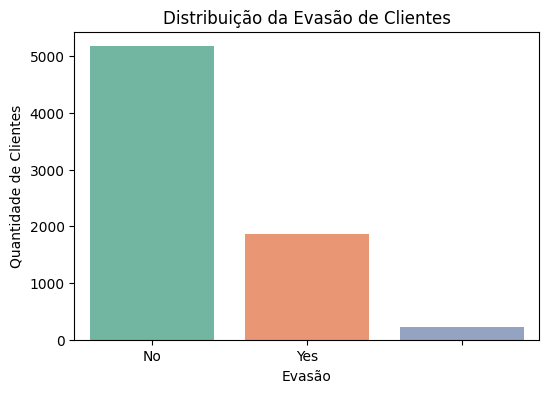

In [71]:
plt.figure(figsize=(6,4))
sns.countplot(x="Evasao", data=df_renomeado, palette="Set2")
plt.title("Distribuição da Evasão de Clientes")
plt.xlabel("Evasão")
plt.ylabel("Quantidade de Clientes")
plt.show()

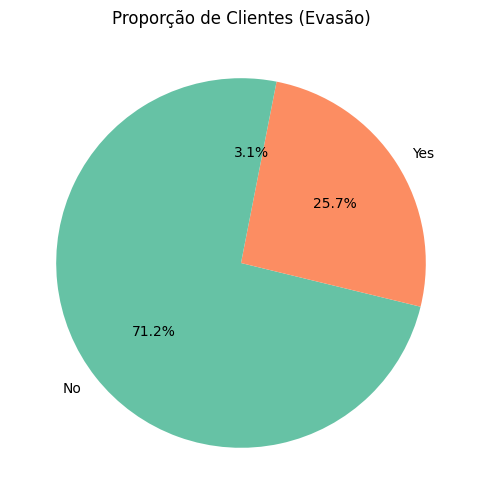

In [72]:
plt.figure(figsize=(6,6))
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90, colors=["#66c2a5","#fc8d62"])
plt.title("Proporção de Clientes (Evasão)")
plt.show()

## Contagem de Evasão por Variáveis Categóricas

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
sns.set(style="whitegrid")

In [81]:
categoricas = ["customer.gender", "account.Contract", "account.PaymentMethod", "account.PaperlessBilling", "internet.InternetService"]

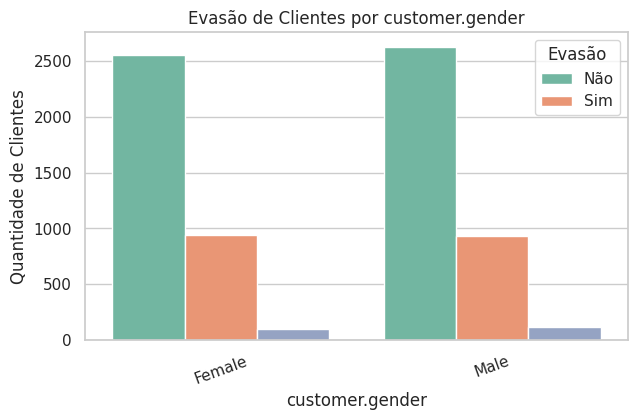

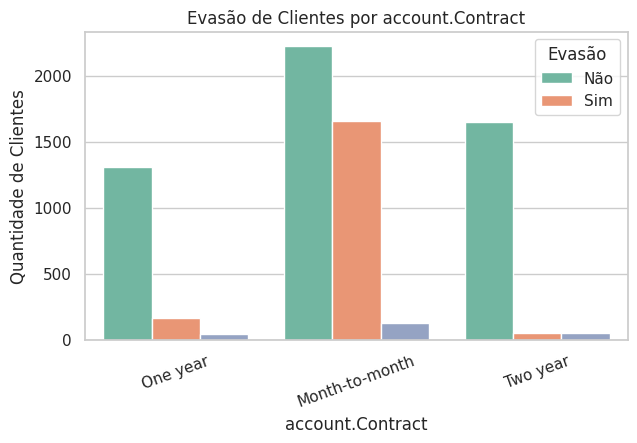

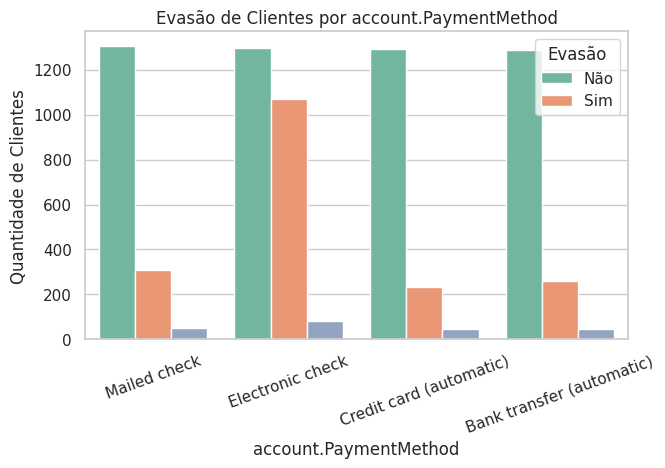

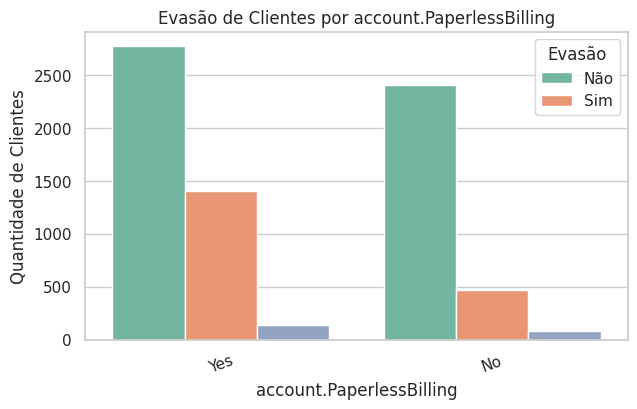

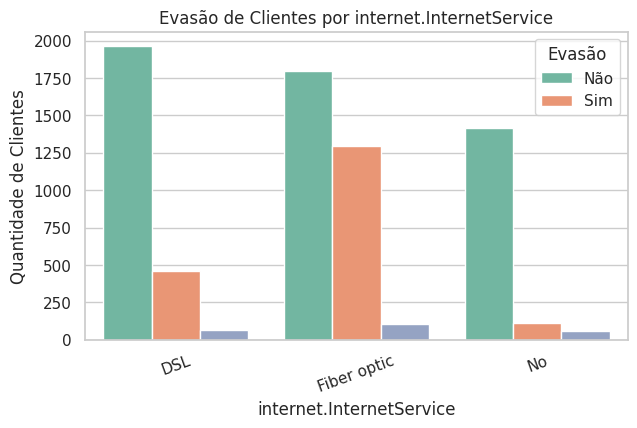

In [78]:
for col in categoricas:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue="Churn", data=df_flat, palette="Set2") # Use df_flat and original Churn column
    plt.title(f"Evasão de Clientes por {col}")
    plt.ylabel("Quantidade de Clientes")
    plt.xlabel(col)
    plt.xticks(rotation=20)
    plt.legend(title="Evasão", labels=["Não", "Sim"])
    plt.show()

## Contagem de Evasão por Variáveis Numéricas

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Use original column names from df_flat for plotting
numericas = ["account.Charges.Total", "account.Charges.Monthly", "customer.tenure", "Contas_Diarias"]

/tmp/ipython-input-241892401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_flat, palette="Set2") # Use df_flat and original Churn column


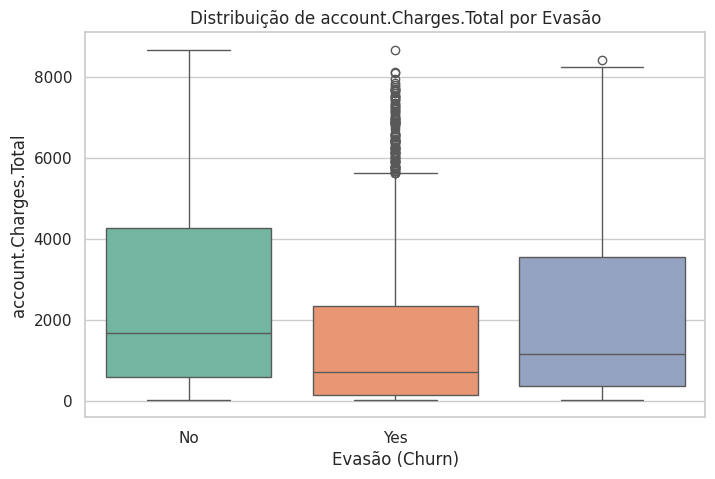

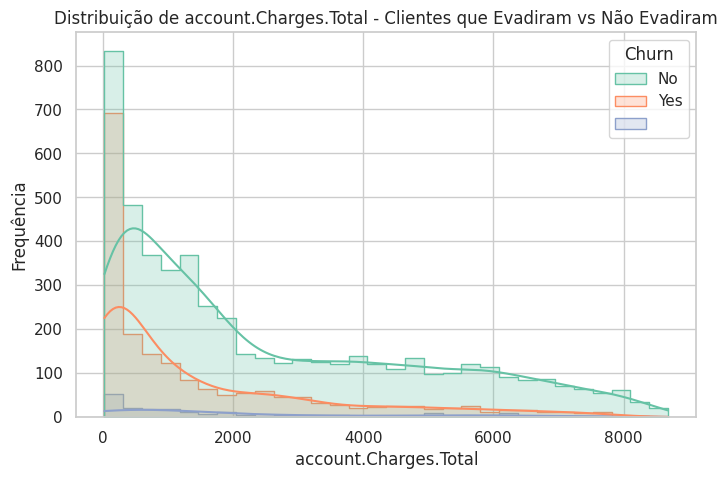

/tmp/ipython-input-241892401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_flat, palette="Set2") # Use df_flat and original Churn column


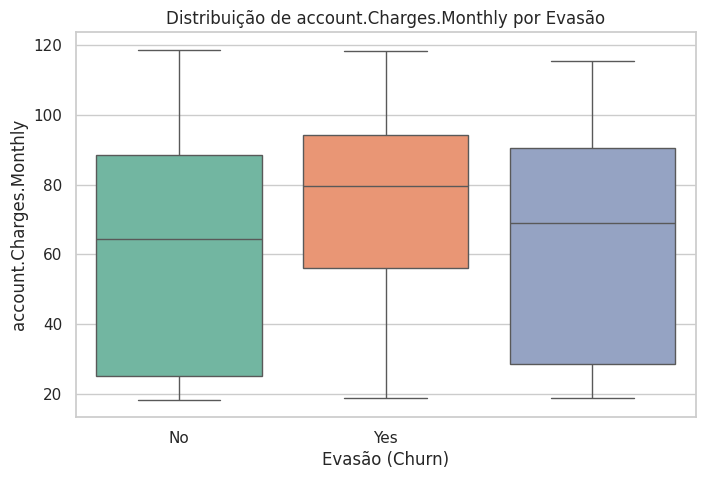

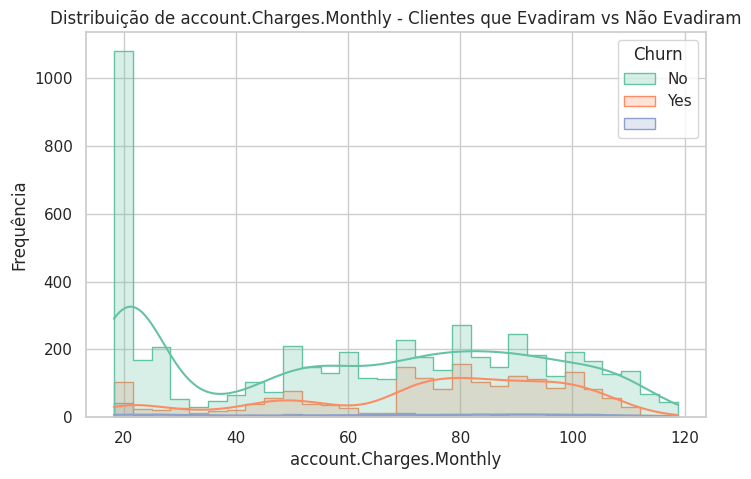

/tmp/ipython-input-241892401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_flat, palette="Set2") # Use df_flat and original Churn column


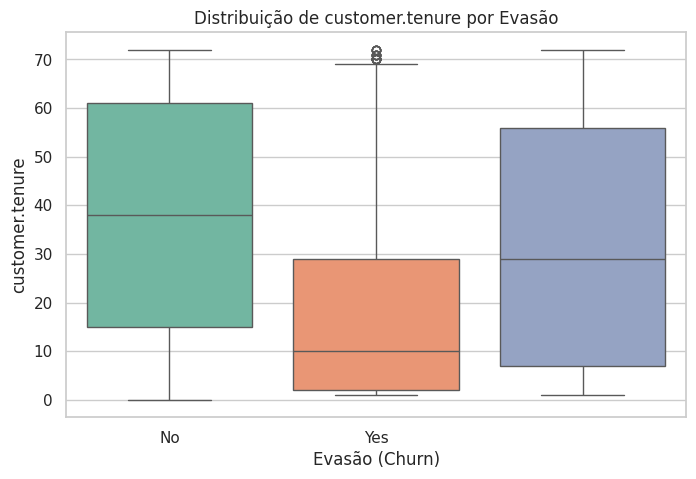

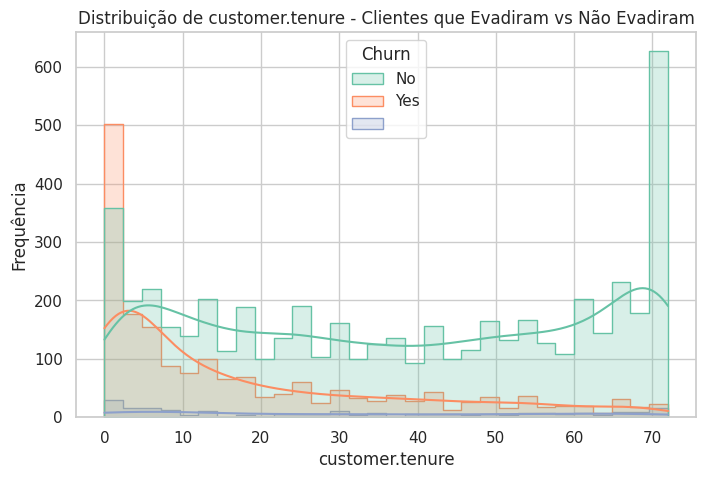

/tmp/ipython-input-241892401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_flat, palette="Set2") # Use df_flat and original Churn column


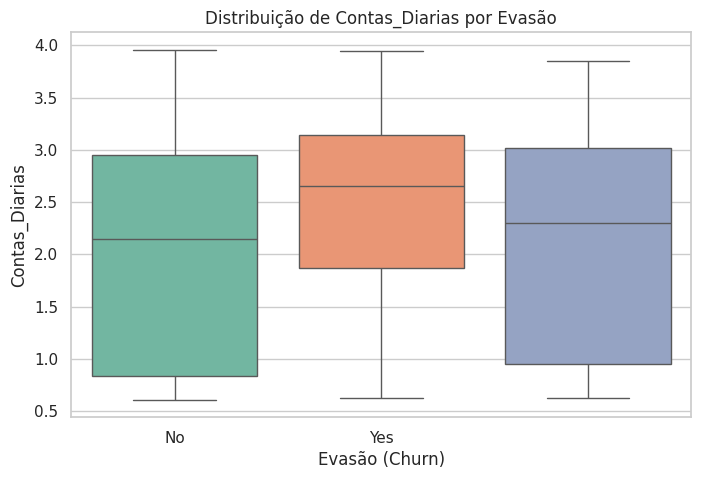

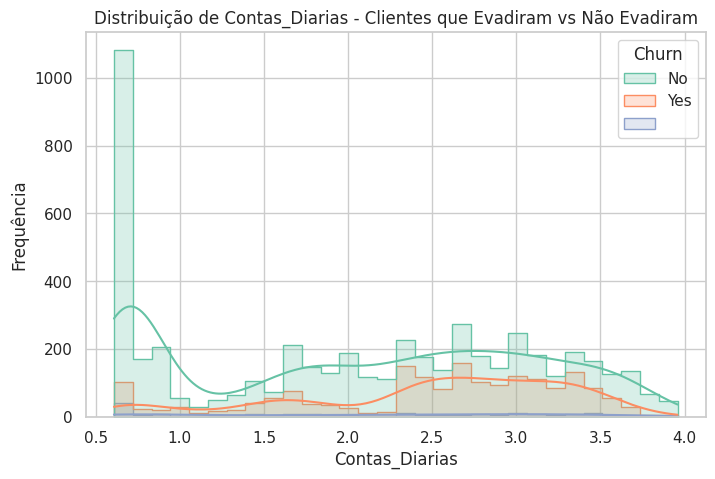

In [86]:
for col in numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Churn", y=col, data=df_flat, palette="Set2") # Use df_flat and original Churn column
    plt.title(f"Distribuição de {col} por Evasão")
    plt.xlabel("Evasão (Churn)")
    plt.ylabel(col)
    plt.show()

    plt.figure(figsize=(8,5))
    sns.histplot(data=df_flat, x=col, hue="Churn", kde=True, palette="Set2", bins=30, element="step") # Use df_flat and original Churn column
    plt.title(f"Distribuição de {col} - Clientes que Evadiram vs Não Evadiram")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

# Relatório Final

Esta análise tem como objetivo compreender os fatores que contribuem para a evasão de clientes da Telecom X, um problema que impacta diretamente a receita e a sustentabilidade da empresa. Para isso, extraí os dados de uma API em formato JSON, converti-os para um DataFrame e apliquei procedimentos de limpeza, incluindo padronização de categorias, tratamento de valores ausentes e criação da variável de cobrança diária.

Na análise exploratória, identifiquei que a evasão se concentra em clientes com contratos mensais, menor tempo de permanência e valores totais de cobrança mais baixos, o que indica cancelamentos precoces. Também observei que clientes que utilizam serviços adicionais, como segurança online ou suporte técnico, apresentam menor probabilidade de evasão, enquanto faturas mensais mais elevadas parecem estar associadas a maior risco de cancelamento. Contratos de longo prazo, por outro lado, mostraram-se mais eficazes na retenção.

A partir desses achados, concluo que os maiores desafios estão na retenção de clientes recém-adquiridos e nos planos de curto prazo. Para reduzir a evasão, recomendo investir em estratégias de engajamento no início da jornada, oferecer incentivos para a migração a contratos anuais e revisar a percepção de valor dos planos com cobranças mais altas. Essas medidas, aliadas a modelos preditivos futuros, podem fortalecer a fidelização e reduzir de forma significativa a evasão de clientes.